# Data extraction script

## Imports

In [4]:
import pandas as pd
import os
from os.path import isfile, join
import numpy as np
import ast
import matplotlib.pyplot as plt
import warnings
import csv
import datetime as dt

In [6]:
path = "data/dysfunctional-ball-task-weekly"
files = []
for file in [join(path, f) for f in os.listdir(path) if (isfile(join(path, f)) and f[0] != '.')]:
    files.append(file)# pd.read_csv(file, quoting=csv.QUOTE_MINIMAL, engine='python')))



In [7]:
files

['data/dysfunctional-ball-task-weekly\\2025-07-09 08_38_06_6140ef8d27499e70e8740918.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_38_22_678bad003d15e6aba1ee5a5d.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_38_39_653a6a7224e6c0bfb644ff9b.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_38_47_646219bb0b91a6f3327e39fb.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_38_54_66a4f108a03ede09bb40255c.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_38_59_5d1290103b20b0000102e8e3.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_39_00_665f239f78bd39782ef04172.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_39_16_669c1e1fdb95a995eb1d3077.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_39_21_665f10dc49cd980fdf304c19.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_39_30_615d8873c11a1982c8838b54.csv',
 'data/dysfunctional-ball-task-weekly\\2025-07-09 08_40_24_65f19a1fe38352676f83d5f0.csv',
 'data/dys

## Extract data

### Per trial

In [35]:
columns_normal = [
    "prolific_id", 
    "SESSION_ID", 
    "STUDY_ID", 
    "trial_number", 
    "tutorial_trial_number", 
    "control_level",
    "trial_start_time",
    "phase1_start_time",
    "phase2_start_time",
    "phase3_start_time",
    "goals_layout",
    "goal_1_value",
    "goal_1_distance",
    "goal_2_value",
    "goal_2_distance",
    "goal_selected",
    "participant_initial_score",
    "participant_final_score",
    "outcome",
    "outcome_total",
    "participant_final_score_prop",
    "goal_choice_rt",
    "allocated_time",
    "allocated_time_remaining",
    "goal_direction",
    "key_presses"
]

columns_counts = [
    "num_key_presses",
    "num_perfect",
    "num_errors",
    "num_randdir",
    "num_randdir_good_moves",
    "num_whilered",
    "num_whileblue",
    "num_blue",
    "num_good_moves",
]

columns_post_trial = [
    "AttribQ",
    "ControlQ",
    "StressQ",
    "MotivationQ",
]

columns_pre_post_task = [
    "PreSkillQ",
    "PrePerfQ",
    "PreMotivationQ",
    "PostSkillQ", 
    "PostPerfQ",
    "PostMotivationQ"
]

# columns_questionnaires = [
#     "phq",
#     "shaps",
#     "ius",
#     "gad",
#     "pss",
#     "drsp",
#     "stress",
#     "psst_symptoms",
#     "psst_interference"
# ]

columns_questionnaires = [
    "drsp",
    "stress",
]

# columns_demographics = [
#     "age",
#     "gender_identity",
#     "assigned_sex",
#     "menstrual_cycle",
#     "education",
#     "education_parents"]

columns_reproductive_health = [
    "bleeding",
    "date",
    "cycle_certainty",
    "pregnancy",
    "attention_check",
    "hormonal_contraceptives",
    "affect_hormones",
]


columns_session = ["record_date", "duration_assessment"]
# columns_mental_health = [
#     "mental_health_condition","mental_health_treatment","psychiatric_medication",
#     "depression_history","depression_episodes","depression_recent"
# ]

columns = []
columns.extend(columns_normal)
columns.extend(columns_counts)
columns.extend(columns_post_trial)
# columns.extend(columns_questionnaires)
columns.extend(columns_questionnaires)
columns.extend(columns_pre_post_task)
# columns.extend(columns_demographics)
# columns.extend(columns_mental_health)
columns.extend(columns_reproductive_health)
columns.extend(columns_session)


In [9]:
# helpe fu:

def grab_first(data, key, array=False, column="response"):
    """
    Extract the first occurrence of `key` from a JSON-like string column.
    - data: DataFrame or Series
    - key: key to extract
    - array: True if the value is like ["Yes"]
    - column: column name if `data` is a DataFrame
    """
    ser = data if isinstance(data, pd.Series) else data[column]
    if array:
        pat = rf'"{key}"\s*:\s*\[\s*"([^"]*)"'
    else:
        pat = rf'"{key}"\s*:\s*"([^"]*)"'
    s = ser.astype(str).str.extract(pat, expand=False).dropna()
    return s.iloc[0] if not s.empty else np.nan





In [20]:
# per_trial_data.loc[len(per_trial_data)] = row_data
len(row_data)
print(file_name)

data/dysfunctional-ball-task-baseline\2025-07-09 09_13_48_5ff81ab8d6f3fa546efbad4e.csv


In [10]:
len_all = []
for file_name in [join(path, f) for f in os.listdir(path) if (isfile(join(path, f)) and f[0] != '.')]:
    file = pd.read_csv(file_name, quoting=csv.QUOTE_MINIMAL, engine='python')
    len_all.append(len(file))


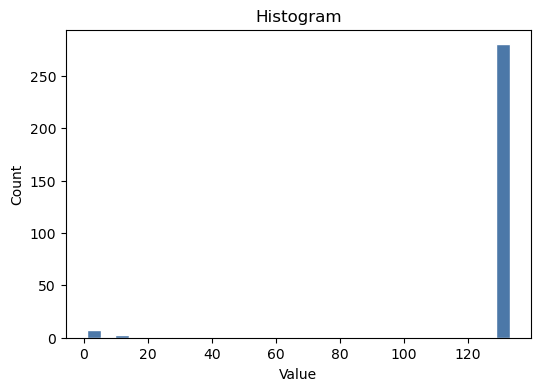

In [ ]:

plt.figure(figsize=(6,4))
plt.hist(len_all, bins=30, color="#4C78A8", edgecolor="white")
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram")
plt.show()



In [32]:
file
i = 20
print(file_name)

trial_data = file.loc[i]
trial_data["prolific_id"]
            # if trial_data["trial_type"] == "ctl-task-cpt":
            #     row_data = []
            #     for label in columns_normal:
            #         row_data.append(trial_data[label])


data/dysfunctional-ball-task-weekly\2025-07-30 16_32_48_undefined.csv


np.float64(nan)

In [36]:
# baseline data:
per_trial_data = pd.DataFrame(columns=columns)
path = "data/dysfunctional-ball-task-weekly"
for file_name in [join(path, f) for f in os.listdir(path) if (isfile(join(path, f)) and f[0] != '.')]:
    file = pd.read_csv(file_name, quoting=csv.QUOTE_MINIMAL, engine='python')
    if (len(file) > 100):
        
        reproductive_health_data = [
            grab_first(file, "bleeding", array=True),
            grab_first(file, "date"),
            grab_first(file, "cycle_certainty"),
            grab_first(file, "pregnancy", array=True),
            grab_first(file, "attention_check", array=True),
            grab_first(file, "hormonal_contraceptives", array=True),
            grab_first(file, "affect_hormones", array=True),
        ]
        questionnaires = []
        no_questionnaire = False
        for i in range(len(file)):
            try:
                if file.loc[i]["eventType"] in columns_questionnaires:
                    questionnaires.append(file.loc[i]["responses"])
            except KeyError:
                no_questionnaire = True
                break
        if no_questionnaire:
            break
        while len(questionnaires) < len(columns_questionnaires):
            questionnaires.append(np.nan)
               
        # questionnaires_type2 = []
        # no_questionnaire_type2 = False
        # for i in range(len(file)):
        #     try:
        #         if file.loc[i]["eventType"] in columns_questionnaires_type2:
        #             questionnaires_type2.append(file.loc[i]["response"])
        #     except KeyError:
        #         no_questionnaire_type2 = True
        #         break
        # if no_questionnaire_type2:
        #     break
        # while len(questionnaires_type2) < len(columns_questionnaires_type2):
        #     questionnaires_type2.append(np.nan)

        questionnaires_pre_post_task = []
        no_questionnaire_pre_post = False
        for i in range(len(file)):
            try:
                if file.loc[i]["eventType"] in columns_pre_post_task:
                    questionnaires_pre_post_task.append(file.loc[i]["response"])
            except KeyError:
                no_questionnaire_pre_post = True
                break
        if no_questionnaire_pre_post:
            print('no pre_post for i ' + str(i))
            break
        while len(questionnaires_pre_post_task) < len(questionnaires_pre_post_task):
            questionnaires_pre_post_task.append(np.nan)
        session_data = [
            file["recorded_at"].iloc[0],
            file["response_timestamp"].max()  - file["response_timestamp"].min() ]

        for i in range(len(file)):
            trial_data = file.loc[i]
            if trial_data["trial_type"] == "ctl-task-cpt":
                row_data = []
                for label in columns_normal:
                    row_data.append(trial_data[label])
                counts = ast.literal_eval(trial_data["counts"])
                for key in columns_counts:
                    row_data.append(counts[key])
                for j in range(len(columns_post_trial)):
                    if trial_data["trial_number"] != 0 and len(file) > i + 1 + j:
                        row_data.append(file.loc[i + 1 + j]["response"])
                    else:
                        row_data.append(np.nan)
                # row_data.extend(questionnaires)
                row_data.extend(questionnaires)
                row_data.extend(questionnaires_pre_post_task)
                # row_data.extend(demographics) 
                # row_data.extend(mental_health_data) 
                row_data.extend(reproductive_health_data) 
                row_data.extend(session_data) 
                per_trial_data.loc[len(per_trial_data)] = row_data
            

In [37]:
per_trial_data.to_csv("per_trial_data_weekly.csv")